# Sampling

In [4]:
from __future__ import print_function

import numpy as np
import sncosmo

%matplotlib inline

In [5]:
# Load an example data set.
# The true model parameters used to create this example are in data.meta.
data = sncosmo.load_example_data()
truths = data.meta
print(truths)

OrderedDict([('x1', 0.5), ('c', 0.2), ('z', 0.5), ('x0', 1.20482820761e-05), ('t0', 55100.0)])


In [6]:
model = sncosmo.Model(source='salt2')  # model to fit
params_to_fit = ['z', 't0', 'x0', 'x1', 'c']  # parameters to vary
bounds = {'z': (0.3, 0.7), 'x0':(0., 1.e-3), 'x1':(-3., 3.), 'c':(-0.3, 0.3)} # bounds on parameters
res, fitmodel = sncosmo.fit_lc(data, model, params_to_fit, bounds=bounds)  # do the fit

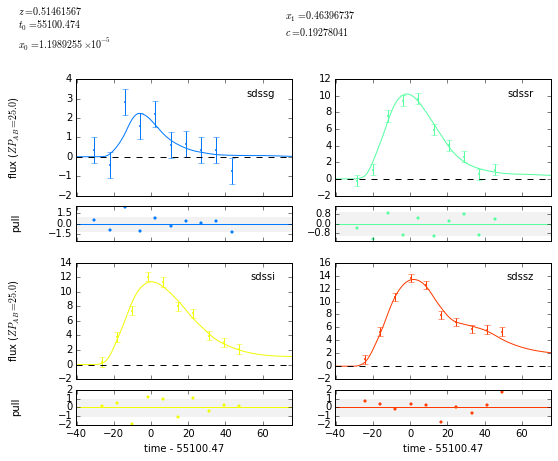

In [8]:
# Plot result of the fit
sncosmo.plot_lc(data, fitmodel);

In [16]:
# Run an MCMC starting from the fitted position (uses emcee package)
errors = [res.errors[name] for name in params_to_fit] # convert errors from a dict to a list
res, est_model = sncosmo.mcmc_lc(data, fitmodel, params_to_fit, bounds=bounds,
                                 nwalkers=100, nburn=50, nsamples=200)

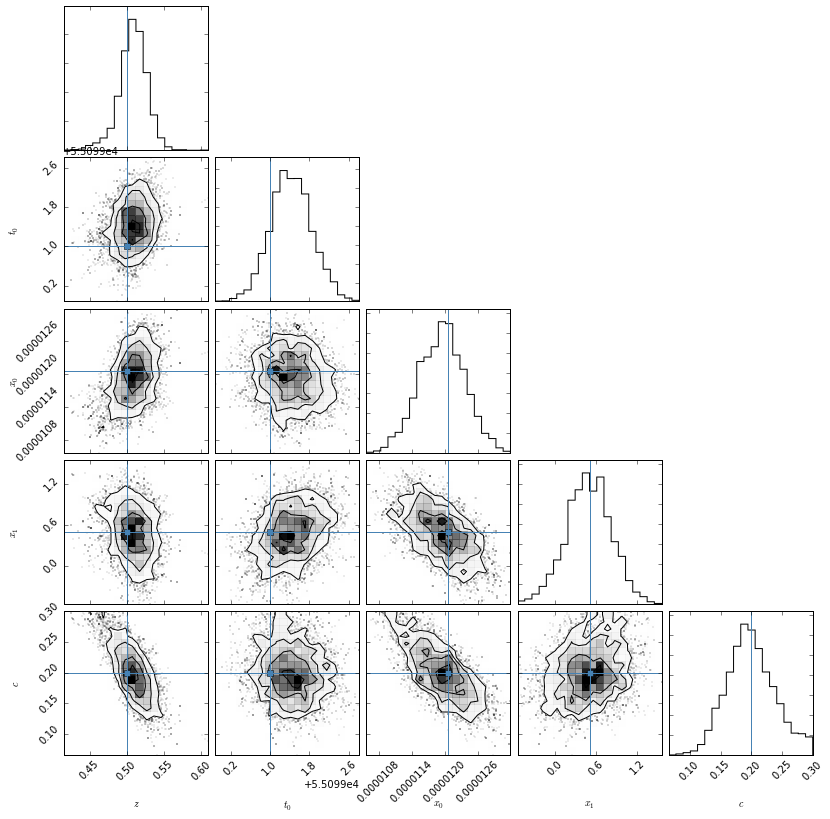

In [15]:
# Make a corner plot using the corner package.
# (The blue point represents the known true value.)
from corner import corner

fig = corner(res.samples, labels=['$z$', '$t_0$', '$x_0$', '$x_1$', '$c$'],
             bins=25, verbose=False, truths=[truths[key] for key in params_to_fit])